Having done data cleaning and wrangling, EDA, and data processing on our dataframe, is it now time to use the data to create a predictive machine learning model. I will experiment with 3 models and see which is the best fit for our data by finding the lowest MSE while preventing overfitting.

Import the necessary libraries.

In [680]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np





Import the CSV file and turn it into a database.

In [682]:
df = pd.read_csv('df_final', index_col = False)


Review the database.

In [684]:
df.head()

,GameID,Global Sales,Price (USD),Metacritic Score,Player Score,NA Sales,Game_F.E.A.R.,Game_Portal 2,Game_The Evil Within,Game_Tomb Raider: Legend,...,Developer_Haemimont,Developer_Io Interactive,Developer_MachineGames,Developer_Obsidian Entertainment,Developer_Rebellion,Developer_Tango Gameworks,Developer_Techland,Developer_Valve Software,Developer_Volition Inc.,Developer_Yuke's
0,12140,3.31,-0.909379,1.175885,0.984675,3.028921,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12140,1.22,-0.909379,1.175885,0.834958,1.165682,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12140,0.03,-0.909379,1.175885,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,748490,0.19,2.429418,0.491903,0.086375,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,748490,0.15,2.429418,0.491903,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Scale the dependent variable, 'Global Sales', so thats its consistent with the scaled indepedent variables.

In [686]:
scaler = StandardScaler()

df['Global Sales'] = scaler.fit_transform(df[['Global Sales']])


Review the newly scaled Global Sales column.

In [688]:
df['Global Sales'].describe()

count    4.420000e+02
mean     1.125294e-16
std      1.001133e+00
min     -7.330029e-01
25%     -6.126104e-01
50%     -3.937148e-01
75%      1.535240e-01
max      4.651827e+00
Name: Global Sales, dtype: float64

In [689]:
df.head()

,GameID,Global Sales,Price (USD),Metacritic Score,Player Score,NA Sales,Game_F.E.A.R.,Game_Portal 2,Game_The Evil Within,Game_Tomb Raider: Legend,...,Developer_Haemimont,Developer_Io Interactive,Developer_MachineGames,Developer_Obsidian Entertainment,Developer_Rebellion,Developer_Tango Gameworks,Developer_Techland,Developer_Valve Software,Developer_Volition Inc.,Developer_Yuke's
0,12140,2.878773,-0.909379,1.175885,0.984675,3.028921,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12140,0.591315,-0.909379,1.175885,0.834958,1.165682,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12140,-0.711113,-0.909379,1.175885,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,748490,-0.535997,2.429418,0.491903,0.086375,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,748490,-0.579776,2.429418,0.491903,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Create a linear regression model to see if the relationship between the dependent and independent variables are linear.

In [693]:
model = LinearRegression()

In [694]:
model.fit(X_train, y_train)

LinearRegression()

In [695]:
y_pred = model.predict(X_test)

The accuracy of the test will be determined by its mean squared error (MSE).

In [697]:
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_mse

1.7153947521716861e+22

Create a graph illustrating the linear regression model.

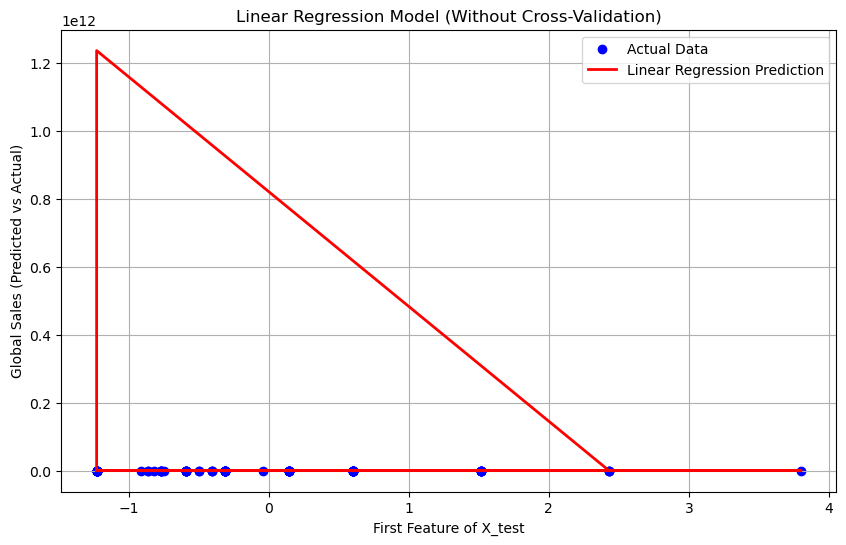

In [699]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Data')  
plt.plot(X_test.iloc[:, 0], y_pred, color='red', linewidth=2, label='Linear Regression Prediction') 
plt.title('Linear Regression Model (Without Cross-Validation)')
plt.xlabel('First Feature of X_test')
plt.ylabel('Global Sales (Predicted vs Actual)')
plt.legend()
plt.grid(True)
plt.show()

The MSE is very high, largely due to the dataset having too many features in order to get an accurate prediction using linear regression.

I will try cross validation on the linear regression model in order to see if that can improve the MSE by allowing all subsets of the data to be tested on.

In [702]:
model = LinearRegression()

In [703]:
cv_scores = cross_val_score(model, X, y, cv= 5, scoring='neg_mean_squared_error')

In [704]:
mse = -cv_scores.mean()
mse

8.36717563225164e+22

Create a graph illustrating the linear regression model that incorporated cross-validation.

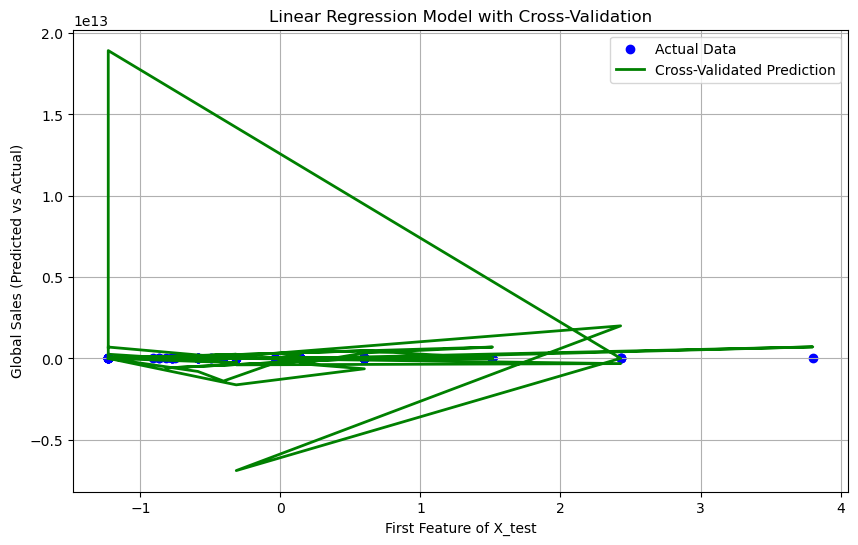

In [705]:
y_pred_cv = cross_val_predict(model, X_test, y_test, cv=5)

plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Data') 
plt.plot(X_test.iloc[:, 0], y_pred_cv, color='green', linewidth=2, label='Cross-Validated Prediction')
plt.title('Linear Regression Model with Cross-Validation')
plt.xlabel('First Feature of X_test')
plt.ylabel('Global Sales (Predicted vs Actual)')
plt.legend()
plt.grid(True)
plt.show()

Doing cross validation on the linear regression test increased the MSE, indicating the lower MSE from the previous test may have contributed to overfitting on a specific subset of data.

I will try the random forest model due to its abillity to handle a larger number of features as compared to a linear regression model.

In [708]:
X = df.drop(columns = ['GameID', 'Global Sales'])
y = df['Global Sales']

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

Tried 50, 100, 150, 200, 300 n_estimators and found that 100 n_estimators to be the most optimal.

In [711]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [712]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [713]:
model_pred = model.predict(X_test)

In [714]:
mse = mean_squared_error(y_test, model_pred)
mse

0.05851468050320904

Create a line graph illustrating the random forest model.

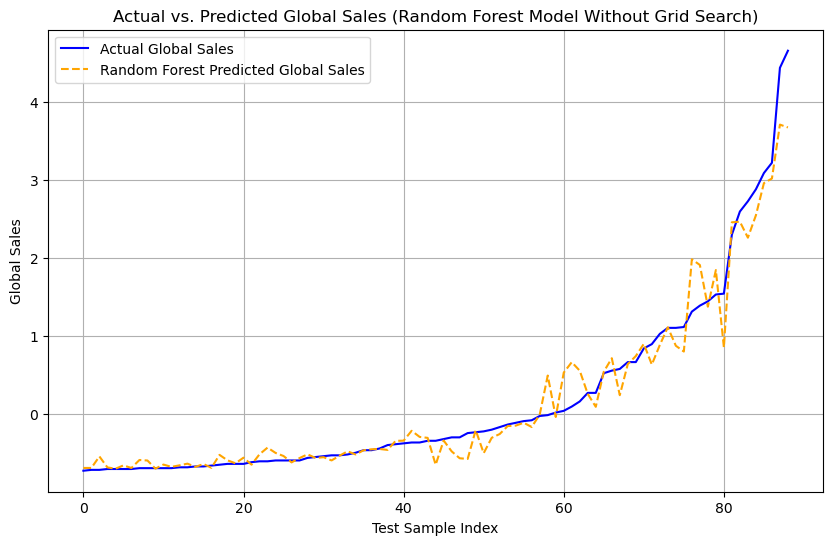

In [715]:
y_test_np = np.array(y_test)
y_pred_rf_np = np.array(y_pred_rf)

sorted_indices = y_test_np.argsort()
y_test_sorted = y_test_np[sorted_indices]
y_pred_rf_sorted = y_pred_rf_np[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Global Sales', linestyle='-', color='blue')
plt.plot(y_pred_rf_sorted, label='Random Forest Predicted Global Sales', linestyle='--', color='orange')
plt.xlabel('Test Sample Index')
plt.ylabel('Global Sales')
plt.title('Actual vs. Predicted Global Sales (Random Forest Model Without Grid Search)')
plt.legend()
plt.grid(True)
plt.show()


The MSE has been greatly reduced using the random forest model, thanks to its ability to handle mutliple features and non-linear data. Next, I will use the grid search function to find the optimal hyperparameters and use cross validation to reduce variance and prevent overfitting.

I will set up the parameter grid with a variety of hyperparameters. 

In [718]:
param_grid  = {'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10, 20]}

In [719]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [720]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error', n_jobs = -1)

In [721]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

Find the optimal parameters.

In [722]:
print(grid_search.best_params_)
print(-grid_search.best_score_)

{'max_depth': 10, 'min_samples_split': 5}
0.09726145070372894


The optimal parameters are a max depth of 10 and a minimal sample split of 5, which leads to a MSE of 0.09726145070372894. 

Create a line graph illustrating the random forest model with the grid search function.

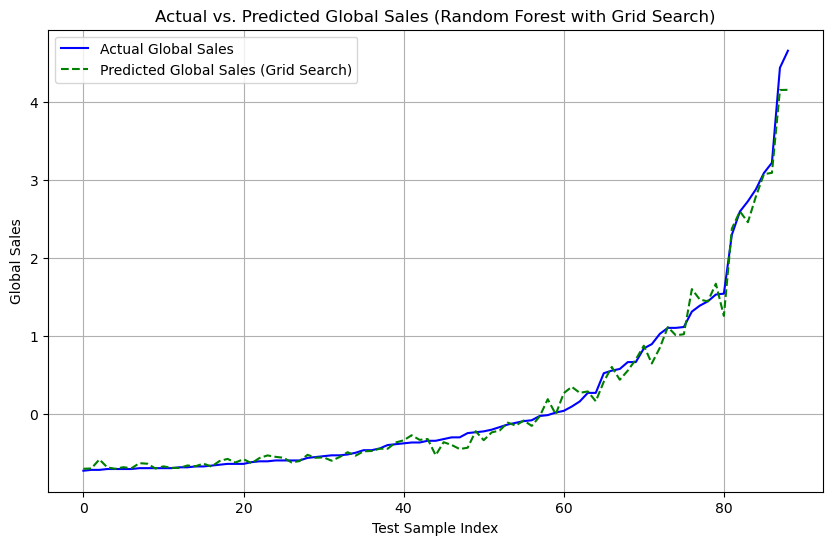

In [723]:
y_test_np = np.array(y_test)
y_pred_rf_gs_np = np.array(y_pred_rf_gs)

sorted_indices = y_test_np.argsort()
y_test_sorted = y_test_np[sorted_indices]
y_pred_rf_gs_sorted = y_pred_rf_gs_np[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Global Sales', linestyle='-', color='blue')
plt.plot(y_pred_rf_gs_sorted, label='Predicted Global Sales (Grid Search)', linestyle='--', color='green')
plt.xlabel('Test Sample Index')
plt.ylabel('Global Sales')
plt.title('Actual vs. Predicted Global Sales (Random Forest with Grid Search)')
plt.legend()
plt.grid(True)
plt.show()

The model found the optimal hyperparameters to be a max depth of 10 with a minimum sample size of 5, leading to a MSE of .0972. This is an increase from the previous MSE, indicating that overfitting may have occured in the previous random forest model.

Next, I will try the gradient boosting regressor model for its ability to handle a large amount of features as well as its ability to reduce overfitting with its shallower estimators, compared to those of a random forest model. 

I chose the most common and flexible hyperparameter values.

In [726]:
model = GradientBoostingRegressor(n_estimators= 100, learning_rate = .1, max_depth = 3, random_state = 42)

In [727]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [728]:
y_pred = model.predict(X_test)

In [729]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05167063571072885

The MSE is 0.05167063571072885, which is the lowest MSE so far.


Create a line graph illustrating the gradient boosting regressor model.

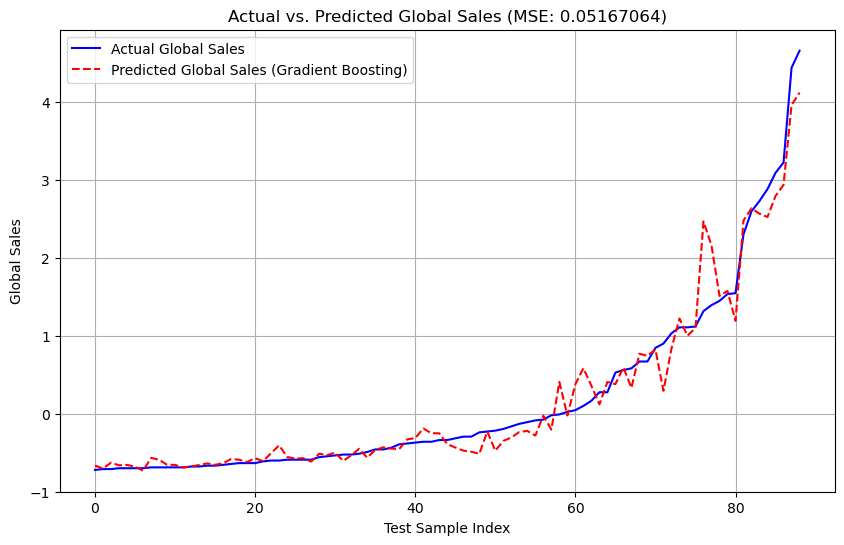

In [730]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

sorted_indices = y_test_np.argsort()
y_test_sorted = y_test_np[sorted_indices]
y_pred_sorted = y_pred_np[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Global Sales', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label='Predicted Global Sales (Gradient Boosting)', linestyle='--', color='red')
plt.xlabel('Test Sample Index')
plt.ylabel('Global Sales')
plt.title(f'Actual vs. Predicted Global Sales (MSE: {mse:.8f})')
plt.legend()
plt.grid(True)
plt.show()

The MSE using the gradient boosting regressor model is the lowest so far, at .0516. However, similar to the random forest model, I'm going to use the grid search function to find the optimal hyperparameters and do cross validation to reduce variance and prevent overfitting.

I will set up the parameter grid with a variety of hyperparameters.

In [733]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10]  
    }


In [734]:
model = GradientBoostingRegressor(random_state = 42)

In [735]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring  = 'neg_mean_squared_error', n_jobs = -1)

In [736]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [737]:
print(grid_search.best_params_)
print(-grid_search.best_score_)

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 300}
0.08982556396073303


The model found the optimal hyperparameters to be a learning rate of .05, a max depth of 4, a minimum sample split of 10, with 300 n_estimators, leading to an MSE of .0898. This is an increase from the previous MSE, indicating that overfitting may have occured in the previous gradient boosting regressor model. However, after testing with several models, optimizing their hyperparameters, and testing on several subsets of the data using cross validation to reduce overfitting, this model comes out as the best fit overall.

Create a line graph illustrating the gradient boosting regressor model with the grid search function.

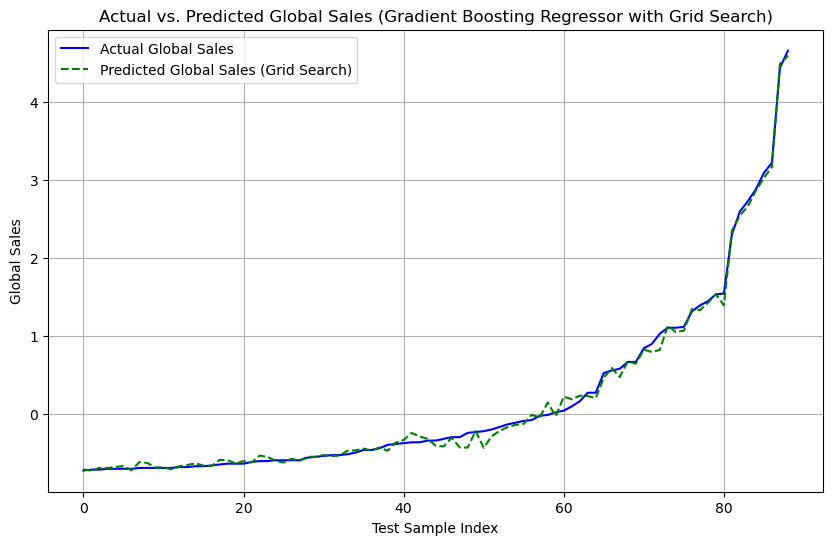

In [740]:
y_pred = best_gbr_model.predict(X_test)

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

sorted_indices = y_test_np.argsort()
y_test_sorted = y_test_np[sorted_indices]
y_pred_sorted = y_pred_np[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Global Sales', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label='Predicted Global Sales (Grid Search)', linestyle='--', color='green')
plt.xlabel('Test Sample Index')
plt.ylabel('Global Sales')
plt.title('Actual vs. Predicted Global Sales (Gradient Boosting Regressor with Grid Search)')
plt.legend()
plt.grid(True)
plt.show()


This graph illustrates the strongest correlation, that prevents overfitting, between our selected models Global Sales predictions versus the actual global sales. 

Conclusion: The gradient boosting regressor model with the grid search turned out to be the most effective choice, as it fine-tuned the settings to prevent overfitting, resulting in a more reliable and consistent model. Although its MSE wasn’t the lowest, grid search allowed the model to perform well across various segments of the data by testing different parameter combinations. This approach makes the model better equipped to handle new, unseen data, rather than just fitting perfectly to a specific dataset. In contrast, the version with the lower MSE but without grid search likely suffered from overfitting, which makes it less practical for real-world predictions.





